# Time Series Dataset Preparation

In [1]:
import sys
sys.path.append("../")
from ImportData import ProcessExperiment
import seaborn as sns
import matplotlib.pyplot as plt
import glob, os
from PoincareSection import *
import pandas as pd
from Utils import HH_Hamiltonian
import Features
from Features import *
from LabelDataset import *
from Utils import RunExperiment
os.chdir("../")

In [2]:
Tstep = 1e-3
Tprint = 1e-0
Tf = 100000.0
solver = 1
w0 = 1.0
w1 = (np.sqrt(5.0)+1.0) / 2.0
q0 = 0.0
E = 0.17
p1 = 0.0

In [3]:
FOLDER = "Runs"

exps = []
count = 0

sali_tresh = 1e-4
megno_tresh = 100
fli_tresh = 5.0

os.chdir(FOLDER)
for file in glob.glob("[!test_]*.json"):
    print(file)
    print(count)
    count+=1
    
    file = file.split(".")[0]
    exp = ProcessExperiment(file, "../" + FOLDER, 4)
    
    
    exp["label_MEGNO"] = MEGNO_Label(exp, megno_tresh)
    exp["label_SALI"] = SALI_Label(exp, sali_tresh)
    fl = FLI_Label(exp,fli_tresh)
    exp["label_FLI"] = fl
       
    exp["allsame"] = (exp["label_MEGNO"] == exp["label_SALI"]) and (exp["label_MEGNO"] == exp["label_FLI"])
    
    if not exp["allsame"]:
        plane = Plane(np.array([1.0, 0, 0, 0]), 0)
        sec = PoincareSection(plane)

        inters = np.array(sec.ComputeFromOrbit(exp["orbit"]))
        exp["inters"] = inters
    else:
        exp["inters"] = None
        
    exps.append(exp)
    

df = pd.DataFrame(exps)

ZLAXYP1629317730_459.json
0
ZLAXYP1629317730_292.json
1
ZLAXYP1629317730_81.json
2
ZLAXYP1629317730_352.json
3
ZLAXYP1629317730_455.json
4
ZLAXYP1629317730_301.json
5
ZLAXYP1629317730_237.json
6
ZLAXYP1629317730_200.json
7
ZLAXYP1629317730_186.json
8
ZLAXYP1629317730_410.json
9
ZLAXYP1629317730_413.json
10
ZLAXYP1629317730_247.json
11
ZLAXYP1629317730_310.json
12
ZLAXYP1629317730_381.json
13
ZLAXYP1629317730_312.json
14
ZLAXYP1629317730_18.json
15
ZLAXYP1629317730_66.json
16
ZLAXYP1629317730_439.json
17
ZLAXYP1629317730_83.json
18
ZLAXYP1629317730_233.json
19
ZLAXYP1629317730_368.json
20
ZLAXYP1629317730_218.json
21
ZLAXYP1629317730_64.json
22
ZLAXYP1629317730_68.json
23
ZLAXYP1629317730_153.json
24
ZLAXYP1629317730_332.json
25
ZLAXYP1629317730_366.json
26
ZLAXYP1629317730_406.json
27
ZLAXYP1629317730_416.json
28
ZLAXYP1629317730_208.json
29
ZLAXYP1629317730_344.json
30
ZLAXYP1629317730_363.json
31
ZLAXYP1629317730_154.json
32
ZLAXYP1629317730_115.json
33
ZLAXYP1629317730_56.json
34
ZL

ZLAXYP1629317730_384.json
281
ZLAXYP1629317730_71.json
282
ZLAXYP1629317730_453.json
283
ZLAXYP1629317730_333.json
284
ZLAXYP1629317730_9.json
285
ZLAXYP1629317730_54.json
286
ZLAXYP1629317730_78.json
287
ZLAXYP1629317730_419.json
288
ZLAXYP1629317730_300.json
289
ZLAXYP1629317730_55.json
290
ZLAXYP1629317730_252.json
291
ZLAXYP1629317730_143.json
292
ZLAXYP1629317730_48.json
293
ZLAXYP1629317730_14.json
294
ZLAXYP1629317730_443.json
295
ZLAXYP1629317730_365.json
296
ZLAXYP1629317730_262.json
297
ZLAXYP1629317730_376.json
298
ZLAXYP1629317730_158.json
299
ZLAXYP1629317730_223.json
300
ZLAXYP1629317730_7.json
301
ZLAXYP1629317730_35.json
302
ZLAXYP1629317730_103.json
303
ZLAXYP1629317730_192.json
304
ZLAXYP1629317730_422.json
305
ZLAXYP1629317730_448.json
306
ZLAXYP1629317730_250.json
307
ZLAXYP1629317730_141.json
308
ZLAXYP1629317730_124.json
309
ZLAXYP1629317730_184.json
310
ZLAXYP1629317730_80.json
311
ZLAXYP1629317730_156.json
312
ZLAXYP1629317730_162.json
313
ZLAXYP1629317730_37.js

## Agreement Analsys

In [9]:
allsame = df[df["allsame"] == True]
allsame["label"] = list(allsame["label_FLI"])

/home/marcobellan/Code/University/Tesi/Tesi_Python/tesi/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Compute Features

In [72]:
def GetLen(df):
    return len(df.iloc[0]["SALI"])

def GetSlice(df, ratio):
    Nold = GetLen(df)
    Nnew = int((Nold - 1) * ratio + 1)
    
    short = df.copy()
    
    salis = []
    flis = []
    megnos = []
    
    for idx in range(len(short)):
        salis.append( short.iloc[idx]["SALI"][0:Nnew] )
        flis.append( short.iloc[idx]["FLI"][0:Nnew] )       
        megnos.append( short.iloc[idx]["MEGNO"][0:Nnew] )   
        
    short["SALI"] = salis
    short["FLI"] = flis
    short["MEGNO"] = megnos
    
    return short

def Finalise(df):
    todrop = ["FLI", "SALI", "MEGNO", "orbit", "tangents", "inters", "allsame",
              "label_FLI", "label_MEGNO", "label_SALI"]
    
    return df.drop(columns=todrop)

def GetFeatures(df):
    exps = []
    pick = 256
    N = GetLen(df)
    
    idx = np.round(np.linspace(0, N-1, pick)).astype(int)
    
    for id, row in df.iterrows():
        exp = row.copy()
        exp["feature_FLI"] = np.log(row["FLI"])[idx]
        exp["feature_SALI"] = row["SALI"][idx]
        exp["feature_MEGNO"] = row["MEGNO"][idx]

        exps.append(exp)
        
    return pd.DataFrame(exps)

In [79]:
treshes = [0.1, 0.05, 0.01, 0.005]

for tresh in treshes:
    reduced = GetSlice(allsame, tresh)
    N = GetLen(reduced)
    
    feats = GetFeatures(reduced)
    feats = Finalise(feats)
    
    feats.to_pickle("Series_512_" + str(N))

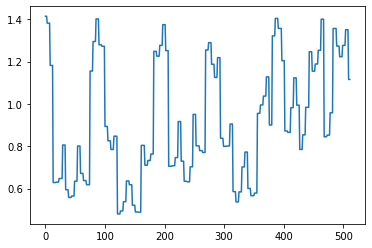

In [74]:
plt.plot(feats.iloc[18]["feature_SALI"])